In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
df_parquet = pd.read_parquet('../data/sample/')
df_parquet.head()

,hvfhs_license_num,dispatching_base_num,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,...,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,pickup_hour_of_day,pickup_day_of_week,pickup_month,waiting_time
0,HV0005,B03406,2022-03-01 00:06:32,2022-03-01 00:11:21,2022-03-01 00:19:39,69,69,1.01,498,6.97,...,5.59,N,N,N,N,N,0,3,3,289
1,HV0003,B03404,2022-03-01 00:25:26,2022-03-01 00:28:37,2022-03-01 00:47:18,26,217,8.50,1121,25.14,...,0.00,N,N,,N,Y,0,3,3,191
2,HV0003,B03404,2022-03-01 00:15:30,2022-03-01 00:18:37,2022-03-01 00:24:08,26,133,0.83,331,7.91,...,6.61,N,N,,N,N,0,3,3,187
3,HV0005,B03406,2022-03-01 00:26:41,2022-03-01 00:31:11,2022-03-01 00:40:41,85,85,0.75,570,7.86,...,5.93,N,N,N,N,N,0,3,3,270
4,HV0003,B03404,2022-03-01 00:27:22,2022-03-01 00:33:46,2022-03-01 00:49:26,231,141,6.48,940,22.05,...,17.16,N,N,,N,N,0,3,3,384


In [4]:
sf = gpd.read_file("../data/taxi_zones/taxi_zones.shp")
zones = pd.read_csv("../data/taxi_zones/taxi+_zone_lookup.csv")

sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

gdf = gpd.GeoDataFrame(pd.merge(zones, sf, on='LocationID', how='inner'))

geoJSON = gdf[['LocationID', 'geometry']].drop_duplicates('LocationID').to_json()

In [5]:
df_parquet = df_parquet.merge(gdf[['LocationID', 'geometry']], left_on='PULocationID', right_on='LocationID')

df_parquet.head()

,hvfhs_license_num,dispatching_base_num,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,...,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,pickup_hour_of_day,pickup_day_of_week,pickup_month,waiting_time,LocationID,geometry
0,HV0005,B03406,2022-03-01 00:06:32,2022-03-01 00:11:21,2022-03-01 00:19:39,69,69,1.01,498,6.97,...,N,N,N,N,0,3,3,289,69,"POLYGON ((-73.91179 40.82643, -73.91131 40.824..."
1,HV0003,B03404,2022-03-01 00:25:26,2022-03-01 00:28:37,2022-03-01 00:47:18,26,217,8.50,1121,25.14,...,N,,N,Y,0,3,3,191,26,"POLYGON ((-73.98332 40.64148, -73.98299 40.641..."
2,HV0003,B03404,2022-03-01 00:15:30,2022-03-01 00:18:37,2022-03-01 00:24:08,26,133,0.83,331,7.91,...,N,,N,N,0,3,3,187,26,"POLYGON ((-73.98332 40.64148, -73.98299 40.641..."
3,HV0005,B03406,2022-03-01 00:26:41,2022-03-01 00:31:11,2022-03-01 00:40:41,85,85,0.75,570,7.86,...,N,N,N,N,0,3,3,270,85,"POLYGON ((-73.94716 40.65559, -73.94703 40.654..."
4,HV0003,B03404,2022-03-01 00:27:22,2022-03-01 00:33:46,2022-03-01 00:49:26,231,141,6.48,940,22.05,...,N,,N,N,0,3,3,384,231,"POLYGON ((-74.00932 40.7247, -74.00864 40.7242..."


In [6]:
df_parquet.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1])

,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,pickup_hour_of_day,pickup_day_of_week,pickup_month,waiting_time,LocationID
count,5155278,5155278,5155278,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06,5.155278e+06
mean,2022-04-04 09:02:37.326981,2022-04-04 09:07:44.152051,2022-04-04 09:26:47.659959,1.386468e+02,1.424735e+02,4.958319e+00,1.144112e+03,2.311566e+01,1.085041e+00,7.312624e-01,1.975432e+00,1.145921e+00,1.866058e-01,1.032075e+00,1.831163e+01,1.343509e+01,4.147617e+00,3.600387e+00,3.068251e+02,1.386468e+02
min,2021-12-31 23:49:06,2022-01-01 00:00:13,2022-01-01 00:04:08,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-9.825000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.244800e+02,0.000000e+00,1.000000e+00,1.000000e+00,-7.966000e+03,2.000000e+00
1%,2022-01-03 11:56:22.390000,2022-01-03 12:00:41,2022-01-03 12:15:28.540000,7.000000e+00,4.000000e+00,4.960000e-01,1.980000e+02,6.840000e+00,0.000000e+00,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.390000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-3.510000e+02,7.000000e+00
5%,2022-01-12 19:33:34.850000,2022-01-12 19:37:07.850000,2022-01-12 19:51:30.550000,2.000000e+01,1.800000e+01,8.000000e-01,3.110000e+02,7.910000e+00,0.000000e+00,2.400000e-01,6.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,5.470000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+01
25%,2022-02-20 01:43:13,2022-02-20 01:48:17.250000,2022-02-20 02:03:39,7.500000e+01,7.600000e+01,1.600000e+00,5.910000e+02,1.134000e+01,0.000000e+00,3.400000e-01,9.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,8.730000e+00,9.000000e+00,2.000000e+00,2.000000e+00,1.830000e+02,7.500000e+01
50%,2022-04-04 12:12:04,2022-04-04 12:16:15.500000,2022-04-04 12:36:56,1.400000e+02,1.420000e+02,3.000000e+00,9.350000e+02,1.791000e+01,0.000000e+00,5.400000e-01,1.530000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.411000e+01,1.400000e+01,4.000000e+00,4.000000e+00,2.670000e+02,1.400000e+02
75%,2022-05-18 09:03:41.250000,2022-05-18 09:09:29.750000,2022-05-18 09:31:07.750000,2.110000e+02,2.180000e+02,6.147000e+00,1.457000e+03,2.839000e+01,0.000000e+00,8.900000e-01,2.470000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.286000e+01,1.900000e+01,6.000000e+00,5.000000e+00,3.900000e+02,2.110000e+02
95%,2022-06-22 09:17:35.300000,2022-06-22 09:22:04.300000,2022-06-22 09:42:58.150000,2.510000e+02,2.610000e+02,1.603000e+01,2.685000e+03,5.570000e+01,6.550000e+00,1.880000e+00,4.910000e+00,2.750000e+00,2.500000e+00,6.150000e+00,4.502000e+01,2.200000e+01,7.000000e+00,6.000000e+00,6.760000e+02,2.510000e+02
99%,2022-06-29 04:40:00,2022-06-29 04:46:23.610000,2022-06-29 05:02:01.150000,2.610000e+02,2.650000e+02,2.582000e+01,4.043000e+03,9.472000e+01,2.100000e+01,3.210000e+00,7.760000e+00,2.750000e+00,2.500000e+00,1.349000e+01,7.239000e+01,2.300000e+01,7.000000e+00,6.000000e+00,1.038000e+03,2.610000e+02


In [7]:
# Remove outliers
df_parquet = df_parquet[(df_parquet['driver_pay'] > 0) & (df_parquet['driver_pay'] < 100)]

<Axes: xlabel='driver_pay', ylabel='Count'>

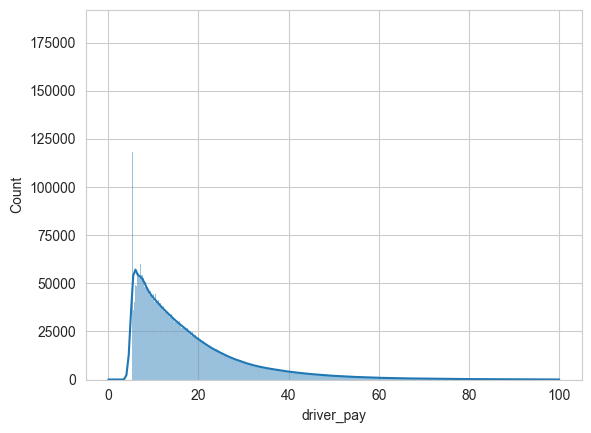

In [8]:
sns.histplot(df_parquet['driver_pay'], kde=True)

In [9]:
sns.histplot(df_parquet['mean_waiting_time'], kde=True)

KeyError: 'mean_waiting_time'

In [ ]:
# Plot waiting time by location
agg = df_parquet.groupby('PULocationID')['waiting_time'].mean().reset_index()
agg = agg.rename(columns={'waiting_time': 'mean_waiting_time'})
agg['log_mean_waiting_time'] = np.log(agg['mean_waiting_time'])
agg = agg.rename(columns={'PULocationID': 'LocationID'})

agg = gdf.merge(agg, on='LocationID', how='inner')

import folium
m = folium.Map(
    location=[40.73, -73.74],
    tiles="Stamen Terrain",
    zoom_start=10,
    attr="unimelb",
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False
)

# refer to the folium documentations on more information on how to plot aggregated data.
c = folium.Choropleth(
    geo_data=geoJSON,  # geoJSON 
    name='choropleth',  # name of plot
    data=agg,  # data source
    columns=['LocationID', 'log_mean_waiting_time'],  # the columns required
    key_on='properties.LocationID',  # this is from the geoJSON's properties
    fill_color="PuBuGn",  # color scheme
    nan_fill_color='black',
    # background color map
    fill_opacity=0.7,  # opacity of the
    line_color="white",  # line color
    line_weight=0.5,
    legend_name='Most Profitable Start Zones'
)

c.add_to(m)

m